# Investigating Charging Cost of EVs in New York

## Problem Statement

For this mathematical modelling project, we would be constructing a linear regression models to predict charging cost of Electric Vehicles (EVs) in New York State in U.S. with given datas such as total battery capacity of EV, energy consumed during a charge of EV, time duration to charge the vehicle, and others datas.


## Variables and Parameters

Below are the variables and parameters for this projects:

| Description | Symbol | Unit | Type |
| :----: | :--: | :--: | :---: |
| Total Battery capacity | $X_1$ | kWh | covariates |
| Total energy consumed during a charge | $X_2$ | kWh | covariates |
| Total charging duration | $X_3$ | h | covariates |
| The average charging rate | $X_4$ | kW | covariates |
| Total distance driven | $X_5$ | km | covariates |
| The charging cost | $Y$ | USD | target |
| Coefficient for intercept | $\beta_0$ | USD | parameter |
| Coefficient for battery capacity | $\beta_1$  | 1/kWh | parameter |
| Coefficient for total energy consumed during a charge | $\beta_2$  | 1/kWh | parameter |
| Coefficient for total charging duration | $\beta_3$  | 1/h | parameter |
| Coefficient for average charging Rate | $\beta_4$  | 1/kW | parameter |
| Coefficient for total distance driven | $\beta_5$  | 1/km | parameter |

## Assumptions and Constraints


For this project, we would be having the following assumptions and constraints:

* The data satisfies the assumptions needed to perform linear regression (i.e. the 4 assumptions on the error term $ϵ$).
* Trends in the historical data are expected to remain constant and continue into the future.
* All the data provided are accurate.
* The price of electricity remains constant across the city.
* There are no external factors that influence the performance of the EVs.
* The battery capacity of the EVs remains the same.
* The batteries have no leaks, so all the energy in the batteries is used for driving.
* There is no energy loss in the circuit of the EVs.
* The energy needed to power the car's control system, air conditioning, and other systems is the same for all cars.

## Building Solutions

We first make a multiple linear regression using all data and no transformations: $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5$.

In [19]:
## Import the Packages for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

We would import our data from the file title "ev_charging_NY.csv". 

The ev_charging_NY.csv contains the following data:

* The total Battery Capacity in kiloWatt-hours (kWh)
* The total Energy Consumed during a charge in kiloWatt-hours (kWh)
* The total Charging Duration to charge the vehicle in hours (h)
* The average Charging Rate during the charging session in kiloWatts (kW)
* The total Distance Driven since last charge in kilometers (km)
* The total Charging Cost to charge the vehicle in US dollars ($) for electric car owners in New York State.

In [20]:
# Import data
ev = pd.read_csv('ev_charging_NY.csv')
ev = pd.DataFrame(ev)

We would define our models and use the imported functions of statsmodel.api to fit the datasets.

In [21]:
X = ev[['Battery_Capacity', 'Energy_Consumed', 'Charging_Duration', 'Charging_Rate', 'Distance_Driven']]
Y = ev['Charging_cost']
X = sm.add_constant(X)
reg = sm.OLS(Y,X).fit()
summary_table=reg.summary()

In [22]:
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     356.1
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           3.90e-94
Time:                        17:10:54   Log-Likelihood:                -438.64
No. Observations:                 195   AIC:                             889.3
Df Residuals:                     189   BIC:                             908.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5538      1.04

## Analyze and Assess

The adjusted $R^2$ value of the 5 covarities is high at 0.901, meaning that these covarites have strong linear relationship. However, we noticed that there is a strong multicollinearity between the covariates. 

**Check Assumption 1:** Average value of the error ϵ is zero ($\mathbb{E}$ ϵ = 0).

Next, we would be checking whether the model satisfy the assumption that the average value of the error ϵ is zero.

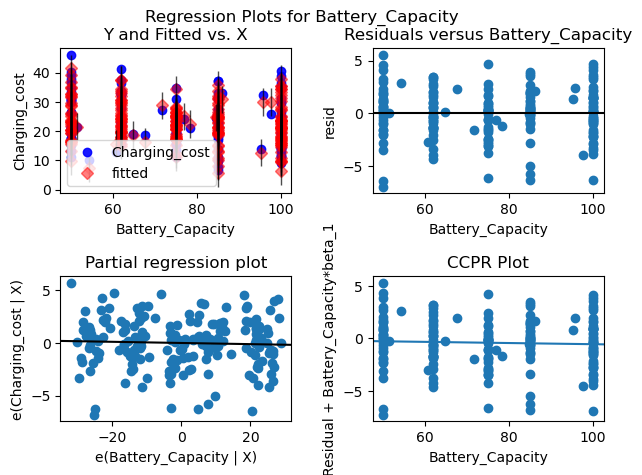

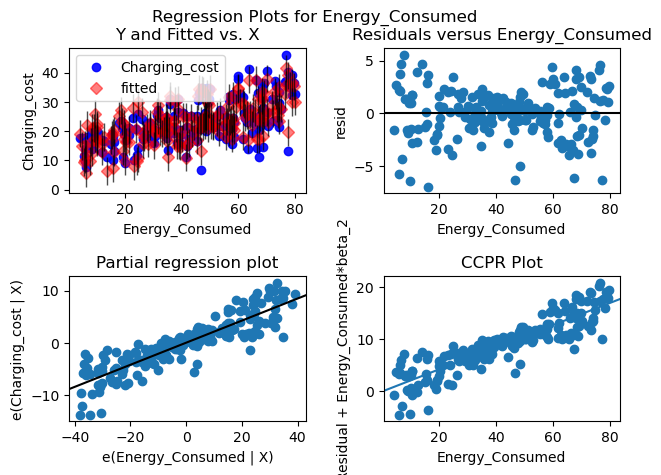

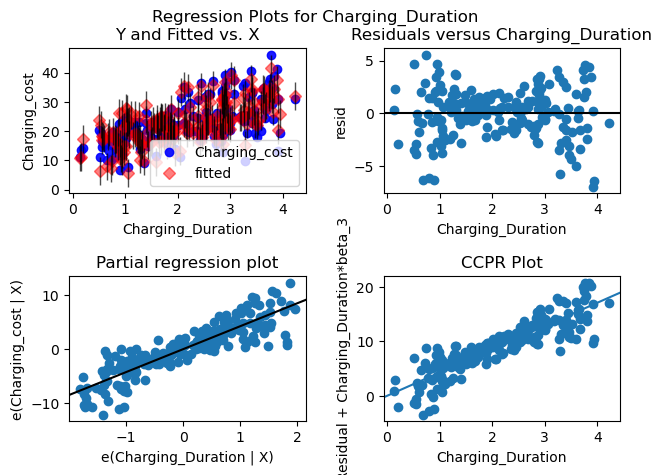

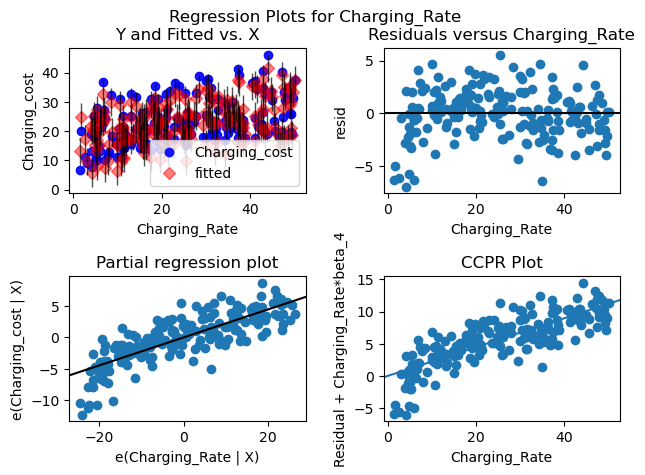

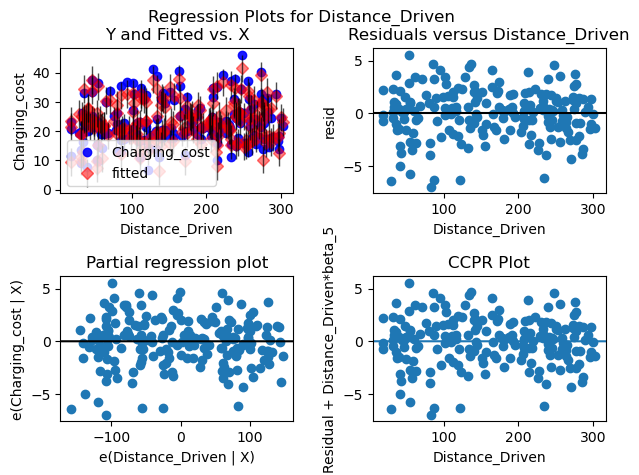

In [23]:
sm.graphics.plot_regress_exog(reg, 'Battery_Capacity')
sm.graphics.plot_regress_exog(reg, 'Energy_Consumed')
sm.graphics.plot_regress_exog(reg, 'Charging_Duration')
sm.graphics.plot_regress_exog(reg, 'Charging_Rate')
sm.graphics.plot_regress_exog(reg, 'Distance_Driven')
plt.show()

Looking at the residuals vs. covariates plots, we see several problems:
1. Battery capacity clearly shows discrete data, with most values at 50, 62, 75, 85, and 100, but the mean still appears to be 0.
2. Energy consumed and charging duration both shows data in a sort of double-cone, with variance first decreasing and then increasing. This indicates a violation of the regression assumptions.
3. Charging rate displays a weak downward parabolic behavior.
4. Distance driven is great, as all points are randomly scattered.

For the partial regression plots, battery capacity and distance driven both are randomly scattered, so there is no linear relationship with the beta coefficients, again violating the assumption of zero mean error. The plots for energy consumed, charging duration, and charging rate are good.

**Check Assumption 2:** Variance of Errors is 0 (var(ϵ) = 0)

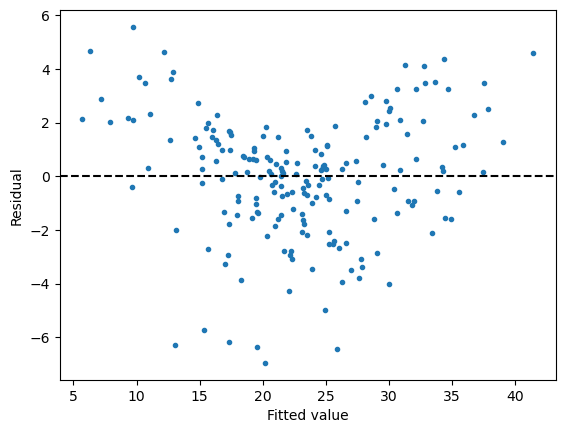

In [24]:
fitted_y = reg.fittedvalues
residuals = reg.resid;
plt.scatter(fitted_y,residuals, marker='.')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value'); plt.ylabel('Residual')
plt.show()

The residuals vs fitted value graph isn't randomly scattered and has a slight parabolic characteristics. This violates the assumption that variance of the errors equal to 0.

**Check Assumption 3**: Errors are normally distributed.

<Figure size 200x200 with 0 Axes>

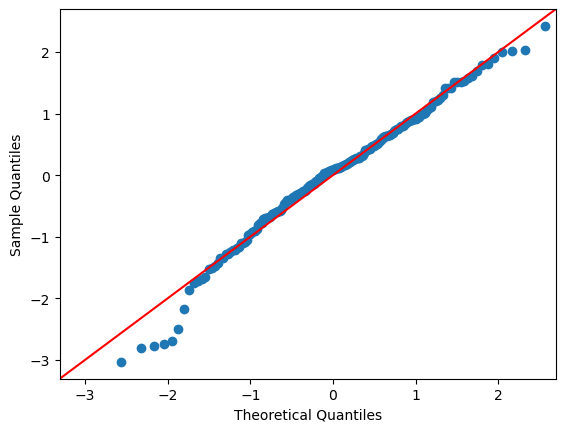

In [25]:
#residuals = reg.resid
plt.figure(figsize=(2, 2)); sm.qqplot(residuals,fit=True, line="45"); plt.show()

We don't see major problems with the QQ plot of the models as the datasets display a quite clear linear relationship.

**Check Assumption 4:** (Errors are independent) Since the data does not involve time series, there aren't dependencies on the error. Hence, we don't (and can't) run the residual vs. index plot.

**Conclusion**: Our preliminary model exhibited violations of assumptions 1 and 2. Hence, we would need to perform some transformations to improve the accuracy of our linear regression model.

## 1st Transformed Model

We propose a new model with the following equations
$Y = \beta_0 + \beta_1 X_1 + \beta_2( X_2 \cdot X_3) + \beta_4 \log(X_4) + \beta_5 \sqrt{X_5}$.

In this model, we created a new variable called Total Energy, which is the multiplication of the Charging Duration values with the Energy Consumed values. In addition, we also took the natural log of the Charging Rate and the square root of the total Distance Driven values.

In [34]:
ev['Total_energy'] = ev['Energy_Consumed']*ev['Charging_Duration']
ev['Charging_Ratenew'] = np.log(ev['Charging_Rate'])
ev['Distance_Driven_new'] = (ev['Distance_Driven'])**(1/2)

X2 = ev[['Battery_Capacity','Total_energy','Charging_Ratenew','Distance_Driven_new']]
Y2 = ev['Charging_cost']

X2 = sm.add_constant(X2)
reg_2 = sm.OLS(Y2,X2).fit()
summary_table=reg_2.summary()

In [35]:
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.430e+04
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.32e-234
Time:                        17:12:55   Log-Likelihood:                -110.36
No. Observations:                 195   AIC:                             230.7
Df Residuals:                     190   BIC:                             247.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6660    

- The adjusted R-squared is high at 0.997, showcasing strong linear relationship.
- The multicollinearity reported in the former model is no longer present in the new model.
- From the p-value, we can see that `Total_energy` and `Charging_Ratenew` are highly significant ($p < 0.001$). While `Battery_Capacity` and `Distance_Driven` have p-values greater than 0.05, indicating that they are not statistically significant predictors in this model.
- The skewness (0.887) implies that residuals are not symmetrically distributed. The qq-plot that follows further supports this.

**Check Assumption 1:** Average value of the error ϵ is zero ($\mathbb{E}$ ϵ = 0).

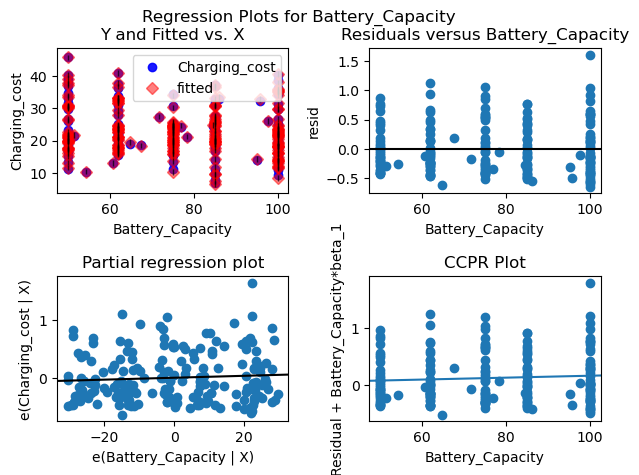

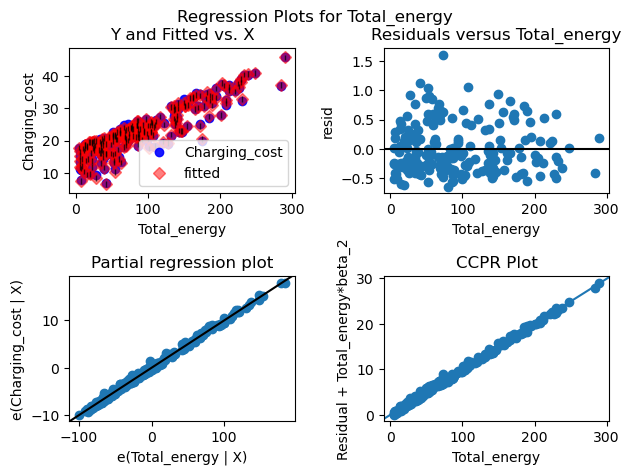

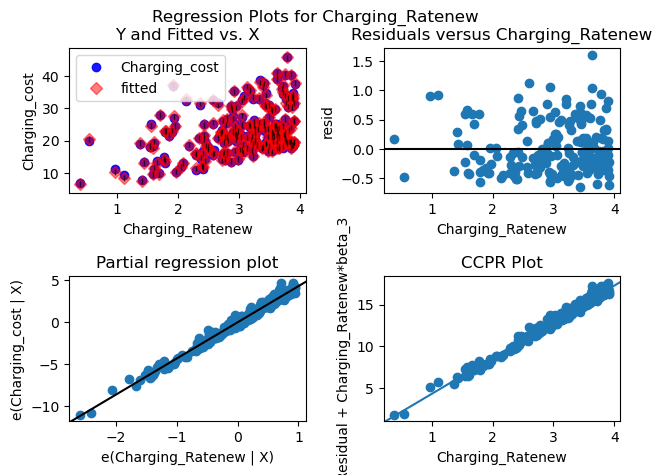

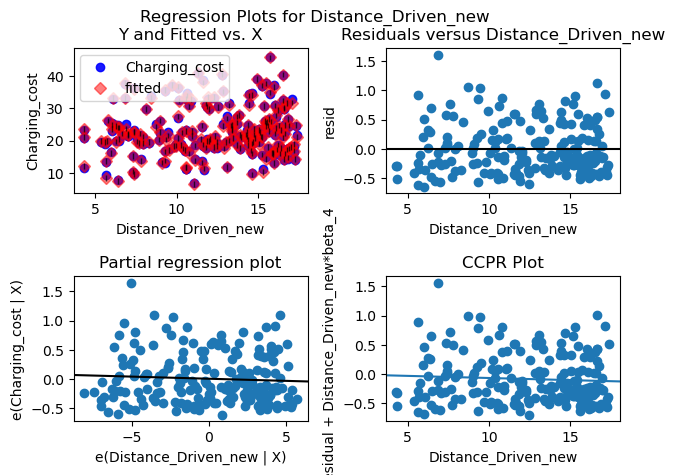

In [36]:
sm.graphics.plot_regress_exog(reg_2, 'Battery_Capacity')
sm.graphics.plot_regress_exog(reg_2, 'Total_energy')
sm.graphics.plot_regress_exog(reg_2, 'Charging_Ratenew')
sm.graphics.plot_regress_exog(reg_2, 'Distance_Driven_new')
plt.show()

After the transformation, the residual vs battery capacity graph still has a discrete patterns and isn't randomly scattered. The partial regression plot of the battery capacity covariates doesn't display a linear relationship. 

The partial regression plot for the new total energy and the new charging covarities has strong linear relationship. Nevertheless, the plots in residual verse total energy and residual verse new charging rate plot displays a fanning characteristic, which isn't ideal.

**Check Assumption 2:** Variance of Errors is 0 (var(ϵ) = 0)

We see an improvement in the residual vs fitted values graph. The graph looks randomly scattered, albeit still with outliers at around \(25, 1.6\) and \(45, 0.2\). Hence the assumption that the variance of the error is 0 is satisfied.

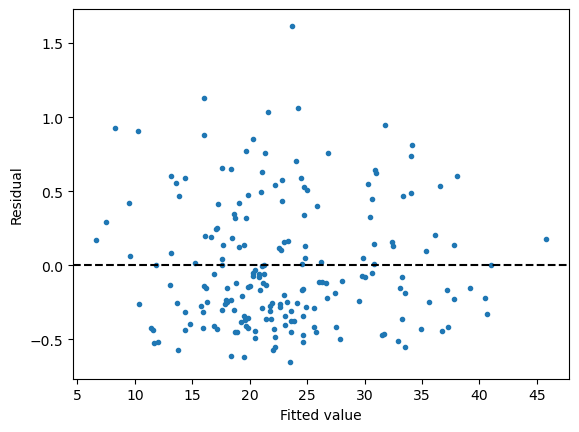

In [29]:
fitted_y_1 = reg_2.fittedvalues
residuals_1 = reg_2.resid
plt.scatter(fitted_y_1,residuals_1, marker='.')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value'); plt.ylabel('Residual')
plt.show()

**Check Assumption 3**: Errors are normally distributed.

<Figure size 200x200 with 0 Axes>

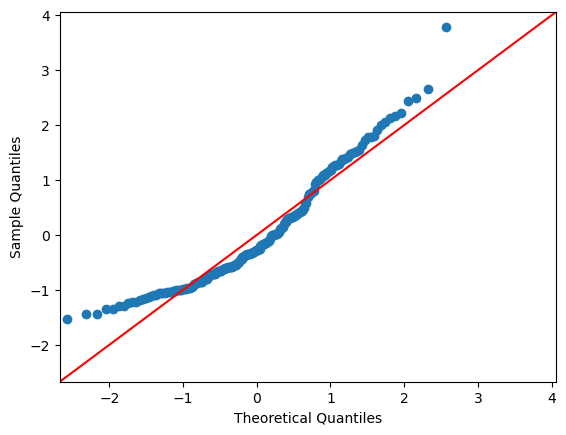

In [30]:
plt.figure(figsize=(2, 2)); sm.qqplot(residuals_1,fit=True, line="45"); plt.show()

The QQ plot of the transformed model displays a slight parabolic characteristics. When we remove the outlier at \(2.6, 3,9\), the datasets has a slightly better linear relationship.

**Conclusion**: Although our first transformed model addresses the violations with assumption 2, violation to assumption 3 is introduced.

## 2nd Transformed Model

A new sets of transformations were introduce in the 2nd transformed model:
$Y = \beta_0 + \beta_1 X_1 + \beta_2( X_2 \cdot X_3) + \beta_4 \sqrt{X_4} + \beta_5 \sqrt{X_5}$.

For this new model, the charging Rate and the total Distance Driven values are square rooted.

In [31]:
ev['Total_energy'] = ev['Energy_Consumed']*ev['Charging_Duration']
ev['Charging_Ratenew'] = (ev['Charging_Rate'])**(1/2)
ev['Distance_Driven_new'] = (ev['Distance_Driven'])**(1/2)

X2 = ev[['Battery_Capacity','Total_energy','Charging_Ratenew','Distance_Driven_new']]
Y2 = ev['Charging_cost']

X2 = sm.add_constant(X2)
reg_3 = sm.OLS(Y2,X2).fit()
summary_table=reg_3.summary()

print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4547.
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.23e-187
Time:                        17:12:20   Log-Likelihood:                -221.39
No. Observations:                 195   AIC:                             452.8
Df Residuals:                     190   BIC:                             469.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4102    

For this new model, we have a R squared adjusted value of 0.989, which indicates strong linear relationships between the datasets.

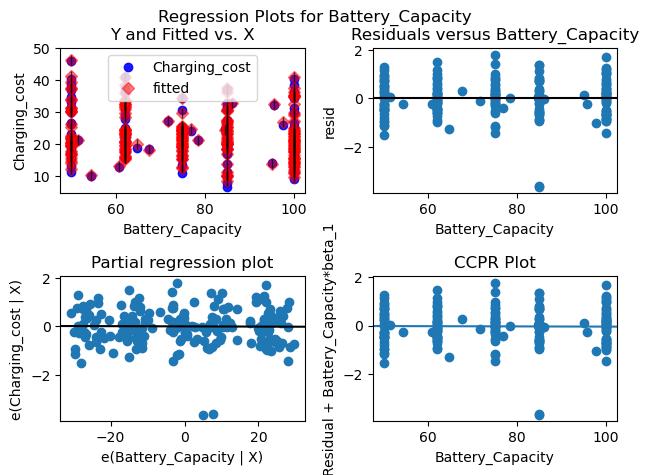

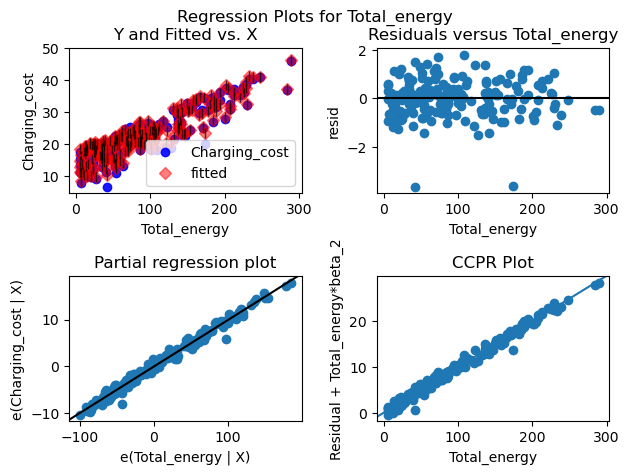

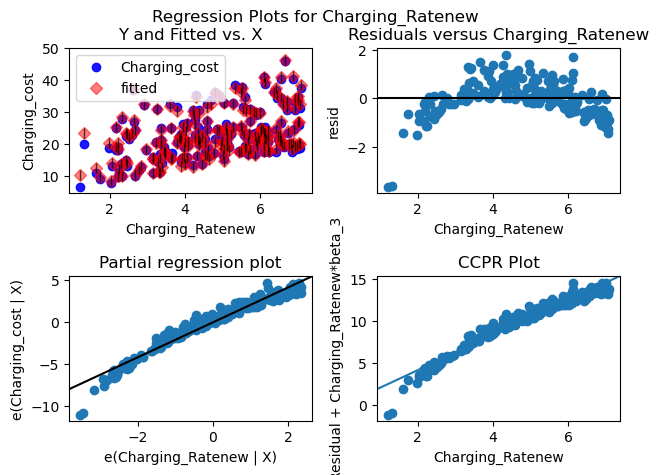

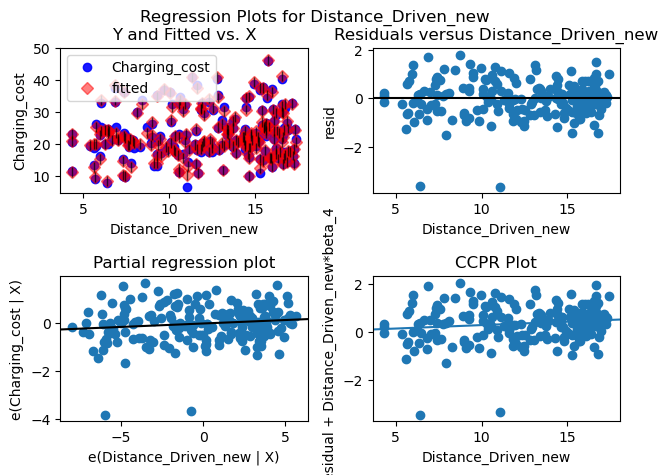

In [33]:
sm.graphics.plot_regress_exog(reg_3, 'Battery_Capacity')
sm.graphics.plot_regress_exog(reg_3, 'Total_energy')
sm.graphics.plot_regress_exog(reg_3, 'Charging_Ratenew')
sm.graphics.plot_regress_exog(reg_3, 'Distance_Driven_new')
plt.show()

The battery capicity residual and regression plot still display discrete patterns similar to the prelimiary and 1st transformed model.

The regression and residual plot for the total energy and new distance driven covarities doesn't have much violations.

However, the residual verse new charging rate graphs have a clear parabolic relationship, which isn't ideal. 

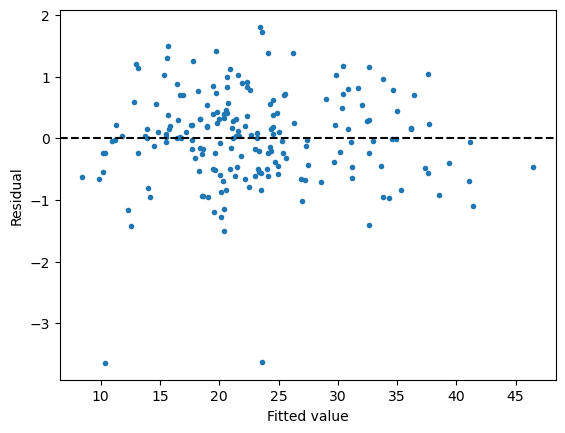

<Figure size 200x200 with 0 Axes>

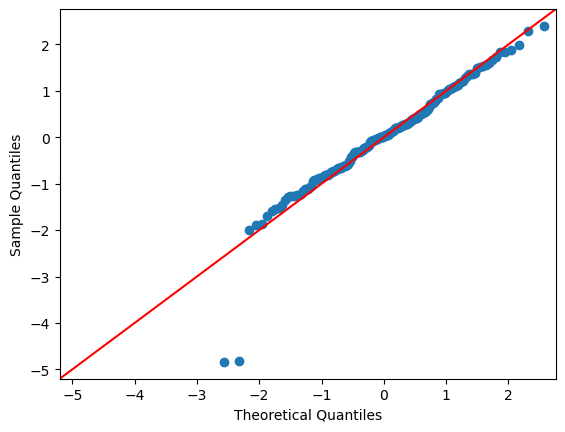

In [48]:
fitted_y_1 = reg_2.fittedvalues
residuals_1 = reg_2.resid
plt.scatter(fitted_y_1,residuals_1, marker='.')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value'); plt.ylabel('Residual')
plt.show()

plt.figure(figsize=(2, 2)); sm.qqplot(residuals_1,fit=True, line="45"); plt.show()

The residuals verse fitted value graph and the QQplot graphs saw drastic improvements after the 2nd sets of transformations. The plots in the residual verse fitted value graph is randomly scattered. Moreover, the datasets in the QQplot showcases clear linear relationship.

## Conclusions

Our preliminary model with no transformations exhibited violations to the assumptions of zero mean error and constant variance. Therefore, we proposed the following multiple linear regression model the charging cost:

$Y = \beta_0 + \beta_1 X_1 + \beta_2( X_2 \cdot X_3) + \beta_4 \sqrt{X_4} + \beta_5 \sqrt{X_5}$.

The values of each of the beta coefficients are as follow:

- The constant ( $\beta_0$) : The baseline `Charging_cost` is 3.4102 when all predictors are zero.
- Battery_Capacity ( $\beta_1$): For each unit increase, `Charging_cost` decrease by 0.0004 units, but this effect is statistically insignificant.
- Total_energy ( $\beta^{*}$): This is a new beta values we calculated. For every unit increase, `Charging_cost` rises by 0.0993 units, a highly significant and strong predictor.
- Charging_Ratenew ( $\beta_4$): For every unit increase, `Charging_cost` increases by 2.0880 units, confirming it as another strong predictor.
- Distance_Driven ( $\beta_5$): The coefficient (0.0287) suggests a slight increase in `Charging_cost` per unit increase, but this effect is not statistically significant.

Below are the models to predict the charging costs:

$Y = 3.4102 + 0.0004 X_1 + 0.0993( X_2 \cdot X_3) + 2.0880 \sqrt{X_4} - 0.0287\sqrt{X_5}$


In comparison to the prelimiary model and 1st transformed model, although the 2nd transformed model isn't perfect, this model is the most optimal in predicting the charging cost of EVs in New York. This transformation greatly improve the QQplot and the residual verse fitted value graph while minizing the violations in the partial regression and residual verse covarities plot for most of the covarities. 

**Discrete Patterns with Battery Capcity Covarities Plot**

The source of this problem is very probably in the nature of the battery capcity data utilized: consumers or producers might have a non-gaussian or non-random preference for the type of batteries or driving behavior. Ergo, it is unavoidable to have problems in the data.